# Simple linear regression

In [120]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#model libraries
import statsmodels.api as sm
from statsmodels.tools import add_constant
pd.set_option('display.max_columns', 50)


In [121]:
#get the dataset 
print(sns.get_dataset_names(), end=" ")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'] 

In [122]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [123]:
#load the dataset
df = sns.load_dataset("mpg")
#select only numerical columns
df= df.select_dtypes("number")

#check top 4 rows
df[:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70


In [124]:
#check missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [125]:
#drop the null values if any
df.dropna(inplace=True)
#check any null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [126]:
#duplicates
df.duplicated().sum()

0

## Simple Linear Regresssion

we model one feature against the target variable

In [127]:
#seperate a feature from a label
X = df["horsepower"]
y = df["mpg"]

In [128]:
#add constant
x_con = add_constant(X)

In [129]:
#create Ols model

model1 = sm.OLS(y, x_con).fit()

In [130]:
#check model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        19:42:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

In [131]:
#seperate features from labels
X = df.drop("mpg", axis=1) #feature
y = df["mpg"] # label

#add constant
X_con1 = add_constant(X)

In [132]:
#create model
model2 = sm.OLS(y,X_con1)
model2 = model2.fit()

In [133]:
#check model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          3.79e-135
Time:                        19:42:43   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model_year       0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
#load the dataset
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [136]:
#check the shape
df.shape

(398, 9)

In [137]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [138]:
#concise stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [139]:
#stat for cat columns
df.describe(include="O").T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [140]:
#check unique values
for i in df.columns:
    uniq_val = df[i].unique()
    print(f'Column name: {i}\n, {uniq_val}\n')
    print("****"*20)
    

Column name: mpg
, [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

********************************************************************************
Column name: cylinders
, [8 4 6 3 5]

********************************************************************************
Column name: displacement
, [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  

Data cleaning

In [141]:
#create copy
df1 = df.copy(deep=True)

In [142]:
#remove white space from the column
df1.columns = df1.columns.str.replace(" ", "_").str.lower()
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [143]:
#check for missing values
df1.isnull().sum()/len(df1)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

1.0873262824048695


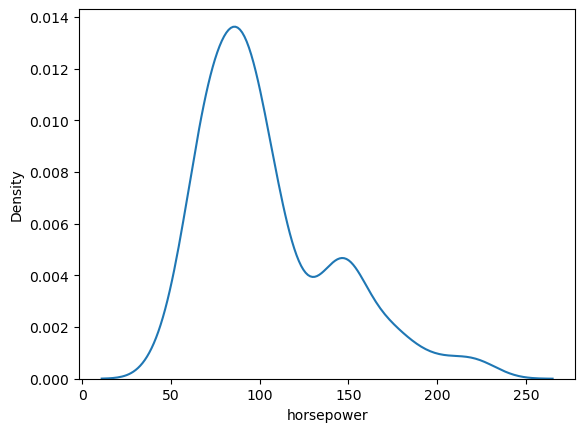

In [144]:
sns.kdeplot(df1["horsepower"])
print(df1["horsepower"].skew())

In [145]:
horse_mean = df1["horsepower"].mean()
horse_mean

df1["horsepower"] = df1["horsepower"].fillna(horse_mean)
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [146]:
#feature engineering/model year
df1["full_year"] = df1["model_year"] + 1900
del df1["model_year"]
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name,full_year
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu,1970
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320,1970
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite,1970
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst,1970
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino,1970


In [147]:
from datetime import datetime

current_year = datetime.now().year

df1["car_years"] =np.subtract(current_year, df1["full_year"])
del df1["full_year"]
del df1["name"]
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_years
0,18.0,8,307.0,130.0,3504,12.0,usa,55
1,15.0,8,350.0,165.0,3693,11.5,usa,55
2,18.0,8,318.0,150.0,3436,11.0,usa,55
3,16.0,8,304.0,150.0,3433,12.0,usa,55
4,17.0,8,302.0,140.0,3449,10.5,usa,55


In [148]:
#save the clean dataset
df1.to_csv("mpg_clean.csv", index=None)

<Axes: >

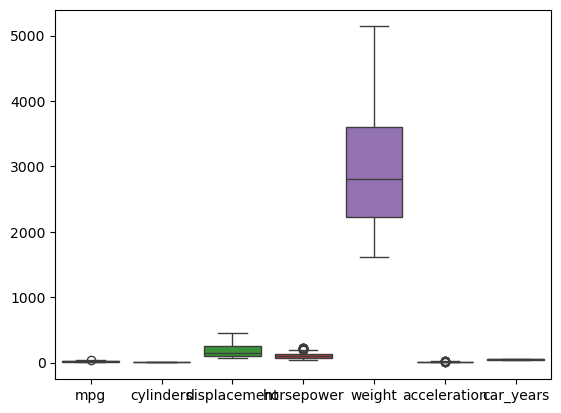

In [149]:
#check outliers
sns.boxplot(df1)

Observation: we have outliers but are genuine
    

<Axes: ylabel='mpg'>

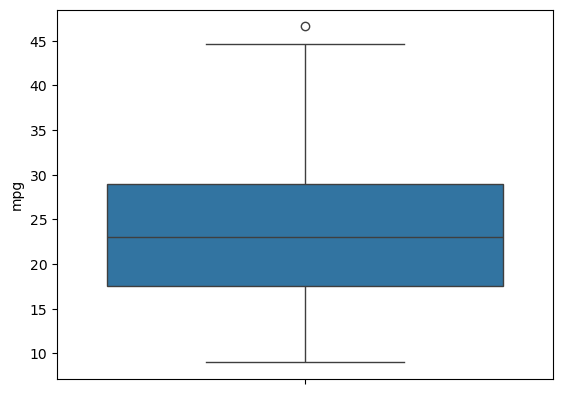

In [150]:
sns.boxplot(df1["mpg"])

## EDA

* univariate
* bivariate analysis
* multivariate analysis

## Pre-Processing

In [151]:
#Preprocessing

#scaling,log tranformation, encodeing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder

In [152]:
#do one hot encoding
orin_one = df1[["origin"]]

ohe = OneHotEncoder(drop="first", sparse_output=False, dtype="int")

encoded_col = ohe.fit_transform(orin_one)
encoded_col


array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [153]:
df1["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [154]:
origin_encode = pd.get_dummies(orin_one, drop_first=True, dtype="int")
origin_encode

,origin_japan,origin_usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [155]:
df2 = pd.concat([df1, origin_encode], axis=1)
del df2["origin"]
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_years,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,55,0,1
1,15.0,8,350.0,165.0,3693,11.5,55,0,1
2,18.0,8,318.0,150.0,3436,11.0,55,0,1
3,16.0,8,304.0,150.0,3433,12.0,55,0,1
4,17.0,8,302.0,140.0,3449,10.5,55,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,43,0,1
394,44.0,4,97.0,52.0,2130,24.6,43,0,0
395,32.0,4,135.0,84.0,2295,11.6,43,0,1
396,28.0,4,120.0,79.0,2625,18.6,43,0,1


In [156]:
#Save prepocessed data
df2.to_csv("mpg_prepro.csv", index=None)

In [157]:
#divide data into label and features
X = df2.drop("mpg", axis=1)
y = df2.mpg

In [158]:
X.shape

(398, 8)

## Train Test split

In [159]:
#split data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

x_train.shape , y_train.shape

((318, 8), (318,))

In [160]:
x_test.shape, y_test.shape

((80, 8), (80,))

## scaling

In [161]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

#instantiate the scaler
std_s = StandardScaler()

x_train_s = std_s.fit_transform(x_train)
x_test_s = std_s.transform(x_test)

## Modeling

In [162]:
#import the library
from sklearn.linear_model import LinearRegression


#create the lr
model1 = LinearRegression()
model1.fit(x_train_s, y_train)

LinearRegression()

In [163]:
#check training score
train_score = model1.score(x_train_s, y_train)
print(f'{train_score:.2f}')

0.82


In [164]:
#made prediction
y_pred = model1.predict(x_test_s)

result = pd.DataFrame({
      "actual" : y_test.values,
      "predicted": y_pred
})
result.sample(10)

,actual,predicted
62,23.0,23.549305
65,25.0,24.890564
6,24.0,27.578535
79,17.0,20.196404
27,24.5,24.565103
69,13.0,12.516330
64,23.0,20.595157
31,36.0,36.251239
11,38.0,35.868219
26,26.0,26.452998


## check model metrics

In [165]:
#import library
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

#check the r2 error
round(r2_score(y_test, y_pred),2)

0.84

In [166]:
MAmean_absolute_error(y_test, y_pred)

2.2875867704420996

In [169]:
MSE = mean_squared_error(y_test, y_pred)
MSE

8.339142500255889

In [170]:
np.sqrt(MSE)

2.8877573478836287

In [171]:
root_mean_squared_error(y_test, y_pred)

2.8877573478836287

## Feature importance

This is done after the modeling to the the most vital features that contributed in getting the model metrics

In [175]:
print(model1.coef_)
print(x_train.columns)

[-0.27544311  2.01366001 -0.49384575 -5.93612313  0.20236728 -2.9765687
 -0.11612639 -1.42927724]
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'car_years', 'origin_japan', 'origin_usa'],
      dtype='object')


In [180]:
# checking feature coeffiennts
coeff = model1.coef_
features = x_train.columns

coeff_df = pd.DataFrame({
    "features": features,
    "coefficient": coeff
    
})
coeff_df

,features,coefficient
0,cylinders,-0.275443
1,displacement,2.013660
2,horsepower,-0.493846
3,weight,-5.936123
4,acceleration,0.202367
5,car_years,-2.976569
6,origin_japan,-0.116126
7,origin_usa,-1.429277


In [184]:
# feature importance

coeff_df["abs_coeff"] = np.abs(coeff_df["coefficient"])
coeff_df = coeff_df.sort_values(by= "abs_coeff", ascending=False)

coeff_df

,features,coefficient,abs_coeff
3,weight,-5.936123,5.936123
5,car_years,-2.976569,2.976569
1,displacement,2.013660,2.013660
7,origin_usa,-1.429277,1.429277
2,horsepower,-0.493846,0.493846
0,cylinders,-0.275443,0.275443
4,acceleration,0.202367,0.202367
6,origin_japan,-0.116126,0.116126


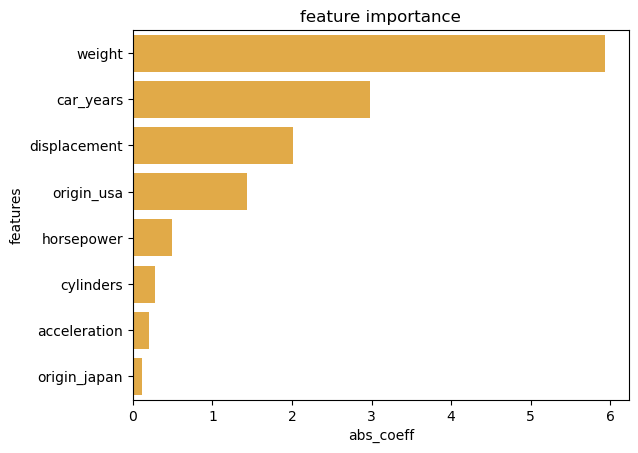

In [191]:
sns.barplot(y= "features", x="abs_coeff", data = coeff_df, color="#FAB12F")
plt.title("feature importance");

In [193]:
# Doing the above in ols
import statsmodels.api as sm  # you call the model using sm.OLS()
from statsmodels.api import OLS  # you instantiate the model using OLS()   # Capital OLS
import statsmodels.formula.api as smf # you instantiate the model useing smf.ols(), lower case ols
from statsmodels.formula.api import ols # you don't need to use smf.ols in the model, just instatiate the model using ols()

In [194]:
#load the clean dataset
data2 = pd.read_csv("mpg_clean.csv")
data2

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_years
0,18.0,8,307.0,130.0,3504,12.0,usa,55
1,15.0,8,350.0,165.0,3693,11.5,usa,55
2,18.0,8,318.0,150.0,3436,11.0,usa,55
3,16.0,8,304.0,150.0,3433,12.0,usa,55
4,17.0,8,302.0,140.0,3449,10.5,usa,55
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,usa,43
394,44.0,4,97.0,52.0,2130,24.6,europe,43
395,32.0,4,135.0,84.0,2295,11.6,usa,43
396,28.0,4,120.0,79.0,2625,18.6,usa,43


In [199]:
#Create ols model

model3 = ols('mpg ~ cylinders +  \
             displacement + horsepower + \
             weight + acceleration +  C(origin) + car_years ', data=data2)   #C if a function used on a categorical feature
                                                                             # to perform onehot encoding in OLs.formula model.

model3 = model3.fit()

In [201]:
#check model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.4
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          7.56e-142
Time:                        20:55:25   Log-Likelihood:                -1036.3
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2127.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             81.9297      3.159     25.931      0.000      75.718      88.141
C(origin)[T.japan]     0.0452      0.559      0.081      0.936      -1.054       1.144
C(origin)[T.usa]      -2.7826      0.557     -4.998      0.000      -3.877      -1.688
cylinders             -0.4208      0.319     -1.318      0.188      -1.048       0.207
displacement           0.0236      0.008      3.098      0.002       0.009       0.039
horsepower            -0.0134      0.013     -1.022      0.307      -0.039       0.012
weight                -0.0070      0.001    -10.858      0.000      -0.008      -0.006
acceleration           0.0996      0.095      1.045      0.297      -0.088       0.287
car_years             -0.7842      0.051    -15.398      0.000      -0.884      -0.684
==============================================================================
Omnibus:                       21.184   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.172
Skew:                           0.415   Prob(JB):                     2.81e-07
Kurtosis:                       4.063   Cond. No.                     5.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Optional

* add interactive term (create extra column by adding highly corrected features), redo the model and check the metrics
* Try remove some highly correlated feature and redo the model. 


Note:
  * Confounder is a feature that is correlated to another feature indirectly.
